In [15]:
import numpy as np
import pandas as pd

In [16]:
def read_file(path):
#     df = pd.read_csv(path,delimiter = '\t',skiprows = [0,1,2,3])
    df = pd.read_csv(path,delimiter = '\t')
    return df

In [17]:
def preprocessing(df):
    # reset column name and drop all row Nan value
    df.columns = df.iloc[3]
    df = df.iloc[4:]
    df = df.dropna()
    # reset data type of each column
    df["LYMPH_NODES_EXAMINED_POSITIVE"] = df["LYMPH_NODES_EXAMINED_POSITIVE"].astype('int64')
    df["NPI"] = df["NPI"].astype('float64')
    df["CELLULARITY"] = df["CELLULARITY"].astype('category')
    df["CHEMOTHERAPY"] = df["CHEMOTHERAPY"].astype('category')
    df["COHORT"] = df["COHORT"].astype('int64')
    df["ER_IHC"] = df["ER_IHC"].astype('category')
    df["HER2_SNP6"] = df["HER2_SNP6"].astype('category')
    df["HORMONE_THERAPY"] = df["HORMONE_THERAPY"].astype('category')
    df["INFERRED_MENOPAUSAL_STATE"] = df["INFERRED_MENOPAUSAL_STATE"].astype('category')
    df["INTCLUST"] = df["INTCLUST"].astype('category')
    df["AGE_AT_DIAGNOSIS"] = df["AGE_AT_DIAGNOSIS"].astype('float64')
    df["OS_MONTHS"] = df["OS_MONTHS"].astype('float64')
    df["OS_STATUS"] = df["OS_STATUS"].astype('category')
    df["CLAUDIN_SUBTYPE"] = df["CLAUDIN_SUBTYPE"].astype('category')
    df["THREEGENE"] = df["THREEGENE"].astype('category')
    df["VITAL_STATUS"] = df["VITAL_STATUS"].astype('category')
    df["LATERALITY"] = df["LATERALITY"].astype('category')
    df["RADIO_THERAPY"] = df["RADIO_THERAPY"].astype('category')
    df["HISTOLOGICAL_SUBTYPE"] = df["HISTOLOGICAL_SUBTYPE"].astype('category')
    df["BREAST_SURGERY"] = df["BREAST_SURGERY"].astype('category')
    
    return df

In [18]:
def category_encoding(df):
    char_cols = df.dtypes.pipe(lambda x: x[x == 'category']).index
    label_mapping = {}
    char_cols

    for c in char_cols:
        df[c], label_mapping[c] = pd.factorize(df[c])
    return df,label_mapping

In [19]:
raw_data = read_file("../data_clinical_patient.txt")
train_data = preprocessing(raw_data)

FileNotFoundError: File b'../data_clinical_patient.txt' does not exist

In [13]:
cat_df,mapping = category_encoding(train_data)

In [14]:
mapping

{}

In [30]:
cat_df = cat_df.drop(['OS_MONTHS'], axis = 1)
cat_df = cat_df.drop(['VITAL_STATUS'], axis = 1)

In [39]:
cat_df = cat_df.drop(['PATIENT_ID'], axis = 1)

In [40]:
# Generate Traing And Testing Data
y = np.array(cat_df['OS_STATUS'])
X = np.array(cat_df.drop(['OS_STATUS'], axis = 1))
# min_max_scaler = preprocessing.MinMaxScaler()
# X = min_max_scaler.fit_transform(X)

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc 
from sklearn import preprocessing

In [35]:
def plot_AUC_ROC(X, y):
    # Split the dataset in two equal parts
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)

    # Set the parameters by cross-validation
#     tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4,1e-5],
#                          'C': [1, 10, 100, 1000]},
#                         {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

    tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10]}]

    # Grid Search
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='f1')
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)

    y_score = clf.decision_function(X_test)

    # Plot ROC AUC Curve
    # Compute ROC curve and ROC area for each class
    fpr,tpr,threshold = roc_curve(y_test, y_score) 
    roc_auc = auc(fpr,tpr) 
    
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}


<Figure size 432x288 with 0 Axes>

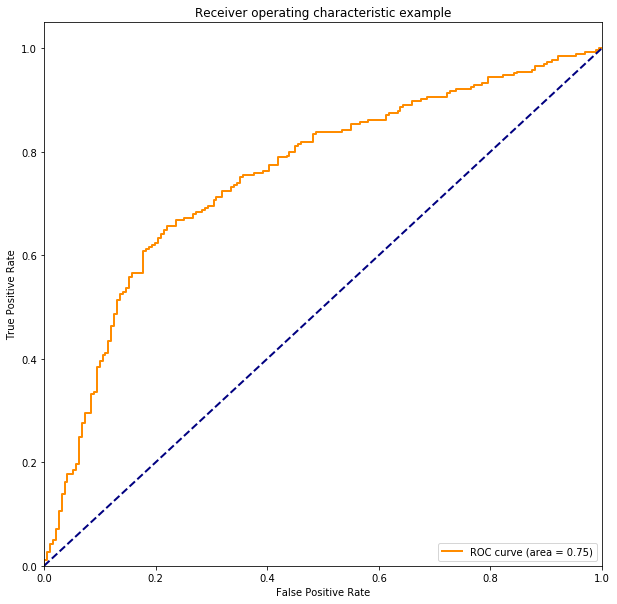

In [41]:
plot_AUC_ROC(X, y)

3,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,...,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
5,MB-0002,0,4.02000,0,0,1,0,0,0,0,...,43.19,84.633333,0,0,0,0,0,0,0,0
8,MB-0008,8,6.08000,0,1,1,0,0,0,1,...,76.97,41.366667,1,1,0,1,0,0,1,1
9,MB-0010,0,4.06200,1,0,1,0,0,0,1,...,78.77,7.800000,1,1,0,1,1,0,0,1
14,MB-0028,1,5.03200,1,0,1,0,1,0,1,...,86.41,36.566667,1,1,0,2,0,0,0,0
15,MB-0035,0,3.05600,0,0,1,1,2,1,1,...,84.22,36.266667,1,2,0,1,1,1,2,1
16,MB-0036,0,3.04400,1,0,1,0,0,0,1,...,85.49,132.033333,1,0,1,1,1,0,0,1
21,MB-0050,3,4.06600,1,1,1,0,0,0,0,...,44.64,75.333333,0,3,1,0,0,0,1,0
26,MB-0060,0,4.04600,0,1,1,0,0,0,0,...,45.43,140.866667,0,1,0,0,0,0,0,0
29,MB-0066,1,4.03200,0,0,1,0,0,0,1,...,61.49,157.433333,0,1,0,0,1,0,0,0
39,MB-0100,0,4.07800,2,1,1,1,0,1,1,...,68.68,8.066667,1,4,2,1,0,0,0,1
